In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

zip_path = "/content/drive/My Drive/store-sales-time-series-forecasting.zip"  # Dosya yolunu değiştir!
extract_path = "/content/data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Dosyalar başarıyla açıldı!")


Dosyalar başarıyla açıldı!


In [ ]:
!ls /content

data  drive  sample_data


In [ ]:
import os

data_path = "/content/data"  # Dosyaların olduğu klasör
files = os.listdir(data_path)
print("📂 Veriler:", files)


📂 Veriler: ['sample_submission.csv', 'test.csv', 'train.csv', 'stores.csv', 'oil.csv', 'holidays_events.csv', 'transactions.csv']


In [ ]:
import pandas as pd

# Verinin yolu
csv_path = "/content/data/train.csv"

# CSV dosyası
df = pd.read_csv(csv_path)

# İlk birkaç satır
df.head()


,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [ ]:
df.shape

df.info()

df.isnull().sum()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


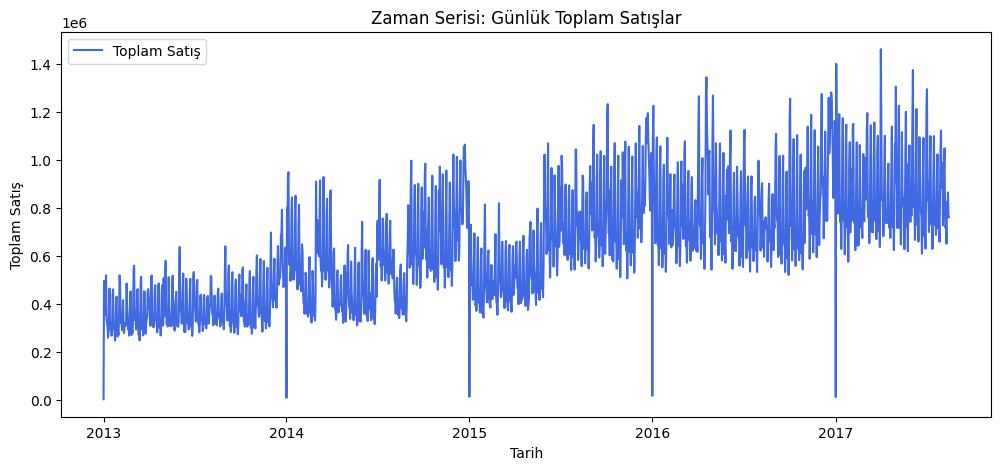

In [ ]:
# date sütununu datetime formatına çevir
df["date"] = pd.to_datetime(df["date"])

# Veriyi tarihe göre sırala
df = df.sort_values("date")

# Tarihe göre satışları çiz
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df.groupby("date")["sales"].sum(), label="Toplam Satış", color="royalblue")
plt.xlabel("Tarih")
plt.ylabel("Toplam Satış")
plt.title("Zaman Serisi: Günlük Toplam Satışlar")
plt.legend()
plt.show()


In [ ]:
df["date"] = pd.to_datetime(df["date"])

<ipython-input-30-5ea33b77ae33>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample("M")["sales"].mean()  # Aylık ortalama satışları hesapla


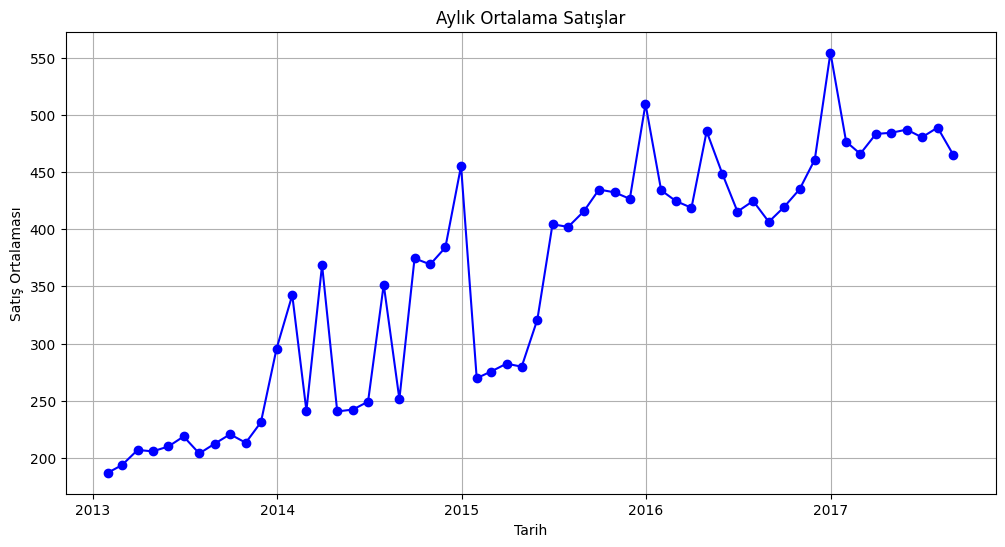

In [ ]:
df.set_index("date", inplace=True)  # Tarihi index olarak ayarla
monthly_sales = df.resample("M")["sales"].mean()  # Aylık ortalama satışları hesapla

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_sales, marker="o", linestyle="-", color="b")
plt.title("Aylık Ortalama Satışlar")
plt.xlabel("Tarih")
plt.ylabel("Satış Ortalaması")
plt.grid(True)
plt.show()

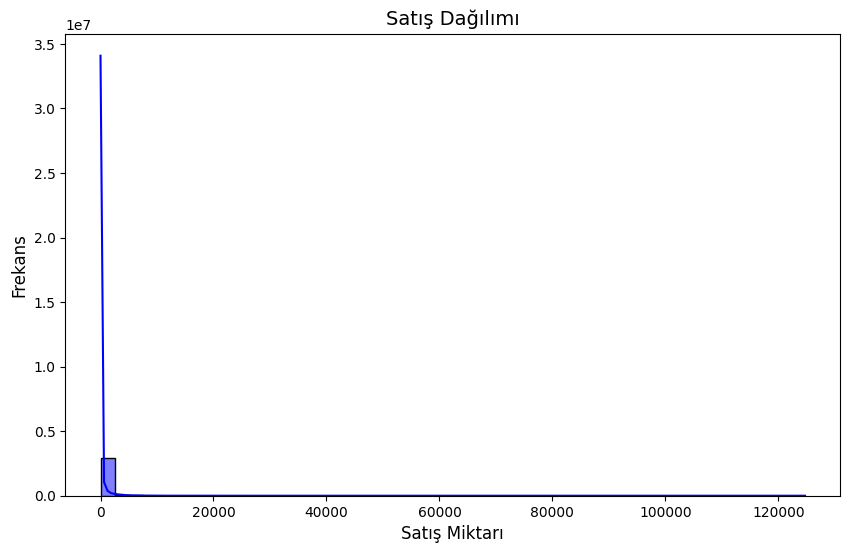

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram çizimi
plt.figure(figsize=(10, 6))
sns.histplot(df['sales'], bins=50, kde=True, color='blue')

# Başlık ve etiketler
plt.title('Satış Dağılımı', fontsize=14)
plt.xlabel('Satış Miktarı', fontsize=12)
plt.ylabel('Frekans', fontsize=12)

# Grafiği göster
plt.show()


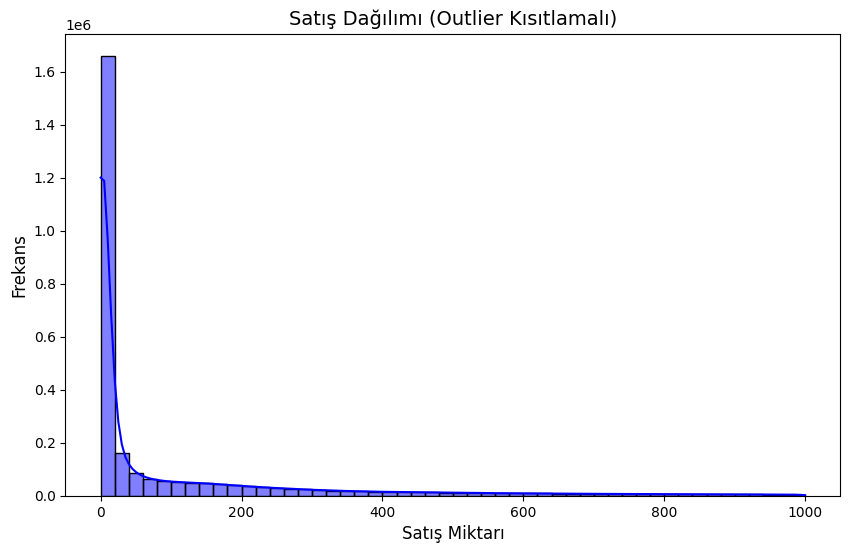

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['sales'] < 1000]['sales'], bins=50, kde=True, color='blue')  # 1000 üzerindeki satışları hariç tut
plt.title('Satış Dağılımı (Outlier Kısıtlamalı)', fontsize=14)
plt.xlabel('Satış Miktarı', fontsize=12)
plt.ylabel('Frekans', fontsize=12)

plt.show()

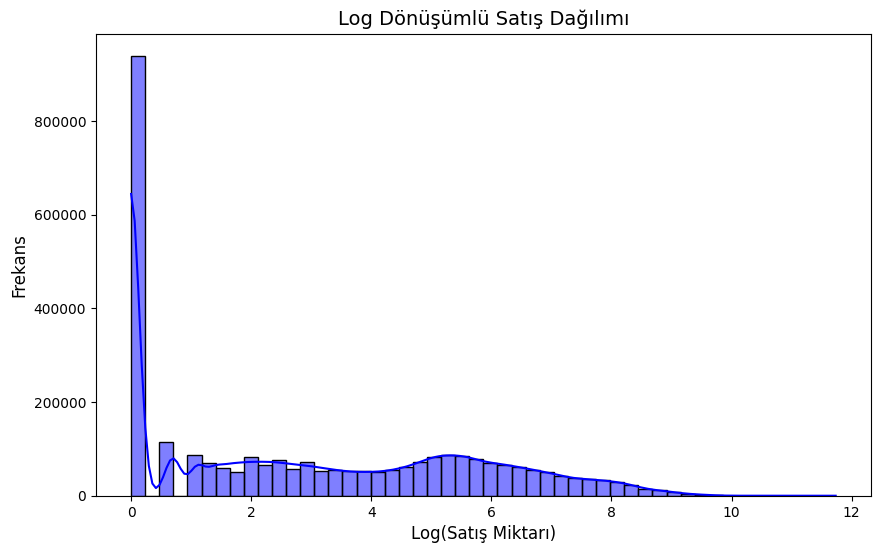

In [ ]:
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['sales']), bins=50, kde=True, color='blue')  # log dönüşümüyle daha dengeli dağılım

plt.title('Log Dönüşümlü Satış Dağılımı', fontsize=14)
plt.xlabel('Log(Satış Miktarı)', fontsize=12)
plt.ylabel('Frekans', fontsize=12)

plt.show()